In [11]:
import pandas as pd
import numpy as np
import os
import config
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import config
from scipy.stats import mannwhitneyu
from joblib import dump, load

In [12]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
GMHI2_scores = pd.read_csv(os.path.join(config.LOG_DIR, "GMHI2_scores_training_set.csv"), index_col=[0, 1])

In [13]:
X.iloc[:20]

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Sample Accession                                            
GMHI-10  SAMN03283239        0.000000                     0.000000   
         SAMN03283266        0.000000                     0.000000   
         SAMN03283281        0.009764                     0.009764   
         SAMN03283294        0.000000                     0.000000   
         SAMN03283288        0.011865                     0.011865   
         SAMN03283255        0.004333                     0.004333   
         SAMN03283260        0.010463                     0.010463   
         SAMN03283250        0.039591                     0.039591   
         SAMN03283249        0.000000                     0.000000   
         SAMN03283285        0.064482                     0.064482   
         SAMN03283253        0.000009                     0.000009   
         SAMN03283284        0.002049                     0.002049   
         SAMN03283240        0.004104                     0.004104   
         SAMN03283251        0.010930                     0.010930   
         SAMN03283254        0.000000                     0.000000   
         SAMN03283256        0.000000                     0.000000   
         SAMN03283258        0.000000                     0.000000   
         SAMN03283272        0.010926                     0.010926   
         SAMN03283252        0.008735                     0.008735   
         SAMN03283268        0.000000                     0.000000   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Sample Accession                                                   
GMHI-10  SAMN03283239                                            0.000000   
         SAMN03283266                                            0.000000   
         SAMN03283281                                            0.009764   
         SAMN03283294                                            0.000000   
         SAMN03283288                                            0.011865   
         SAMN03283255                                            0.004333   
         SAMN03283260                                            0.010463   
         SAMN03283250                                            0.039591   
         SAMN03283249                                            0.000000   
         SAMN03283285                                            0.064482   
         SAMN03283253                                            0.000009   
         SAMN03283284                                            0.002049   
         SAMN03283240                                            0.004104   
         SAMN03283251                                            0.010930   
         SAMN03283254                                            0.000000   
         SAMN03283256                                            0.000000   
         SAMN03283258                                            0.000000   
         SAMN03283272                                            0.010926   
         SAMN03283252                                            0.008735   
         SAMN03283268                                            0.000000   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Sample Accession                                                                         
GMHI-10  SAMN03283239                                               0.000000                      
         SAMN03283266                                               0.000000                      
         SAMN03283281                                               0.009764                      
         SAMN03283294                                               0.000000                      
         SAMN03283288                                               0.011865                      
         SAMN03283255                                               0.004333                      

In [14]:
(X.iloc[[12]] > 0).sum().sum()

139

In [15]:
GMHI2_scores.iloc[:20]

GMHI2
Study_ID Sample Accession          
GMHI-10  SAMN03283239      1.835237
         SAMN03283266      0.103722
         SAMN03283281      1.116329
         SAMN03283294      1.758818
         SAMN03283288      1.675791
         SAMN03283255     -0.084817
         SAMN03283260      2.392176
         SAMN03283250      1.514717
         SAMN03283249     -1.232104
         SAMN03283285      2.379675
         SAMN03283253     -1.138380
         SAMN03283284      2.474919
         SAMN03283240      1.401777
         SAMN03283251      0.341851
         SAMN03283254     -1.236171
         SAMN03283256     -0.096506
         SAMN03283258     -1.181161
         SAMN03283272      1.586619
         SAMN03283252      1.302423
         SAMN03283268     -1.309574

In [16]:
gmhi2 = load(os.path.join(config.MODEL_DIR, "gmhi2_model.joblib"))
gmhi2

LogisticRegression(C=0.03, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [17]:
gmhi2.decision_function(X > 0.00001)

array([ 1.83523716,  0.10372212,  1.11632944, ..., -0.03062121,
        0.9737985 , -0.06633899])

In [18]:
first = X.iloc[[0], :]
nonzero_indices = (first[gmhi2.feature_names_in_] > 0.00001).values.flatten()

In [19]:
first.iloc[:, nonzero_indices]

,,k__Bacteria,k__Bacteria|p__Actinobacteria,k__Bacteria|p__Actinobacteria|c__Actinobacteria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Coriobacteriia,k__Bacteria|p__Actinobacteria|c__Coriobacteriia|o__Coriobacteriales,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Myoviridae|g__P1virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Myoviridae|g__P1virus|s__Escherichia_virus_P1,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Adenoviridae,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Adenoviridae|g__Mastadenovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Adenoviridae|g__Mastadenovirus|s__Human_mastadenovirus_D,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_sp_CAG_530,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella|s__Prevotella_sp_885,k__Bacteria|p__Firmicutes|c__Firmicutes_unclassified|o__Firmicutes_unclassified|f__Firmicutes_unclassified|g__Firmicutes_unclassified|s__Firmicutes_bacterium_CAG_791,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pasteurellales|f__Pasteurellaceae|g__Haemophilus|s__Haemophilus_parainfluenzae
Study_ID,Sample Accession,,,,,,,,,,,,,,,,,,,,,
GMHI-10,SAMN03283239,0.998272,0.079178,0.000235,0.000235,0.000235,0.000235,0.000171,0.000064,0.078944,0.076511,...,0.000784,0.000784,0.000944,0.000944,0.000944,0.000944,0.000529,0.015011,0.000022,0.00064


In [20]:
df = pd.read_csv("../../example/SRR1761666_metaphlan.txt", sep="\t", skiprows=3, usecols=[0, 2], index_col=0).T
df

FileNotFoundError: [Errno 2] No such file or directory: '../../example/SRR1761666_metaphlan.txt'

In [21]:
dummy_cols = list(set(gmhi2.feature_names_in_) - set(df.columns))
dummy_df = pd.DataFrame(np.zeros((1, len(dummy_cols))), columns=dummy_cols, index=["relative_abundance"])
df = pd.concat([dummy_df, df], axis=1)
df = df.copy()[["UNKNOWN"] + list(gmhi2.feature_names_in_)]

NameError: name 'df' is not defined

In [22]:
df

NameError: name 'df' is not defined

In [ ]:
df = df.divide((100 - df["UNKNOWN"]), axis="rows")
df = df.drop(labels=["UNKNOWN"], axis=1)

In [ ]:
df.values.flatten() - first.values.flatten()

In [ ]:
coefficient_df = pd.DataFrame(gmhi2.coef_, columns=gmhi2.feature_names_in_, index=["coefficient"]).T
coefficient_df["relative_abundance"] = df.values.flatten()
coefficient_df = coefficient_df[(coefficient_df["coefficient"] != 0) & (coefficient_df["relative_abundance"] > 0.00001)]
coefficient_df.index.name = "taxa_name"
print(coefficient_df["coefficient"].sum())
coefficient_df

In [ ]:
coefficient_df

In [26]:
runs = pd.read_csv(os.path.join(config.RAW_DIR, "runs.tsv"), sep="\t")
runs

,accession,run_id
0,SAMN06831159,SRR8956684
1,SAMN06831158,SRR8956683
2,SAMN06831132,SRR8956669
3,SAMN06831103,SRR8956663
4,SAMN06831096,SRR8956660
...,...,...
8064,SAMN15195452,SRR12000196
8065,SAMN15195499,SRR11992797
8066,SAMN15195544,SRR12005696
8067,SAMN15195510,SRR11992785


In [39]:
np.random.seed(42)
indices = np.random.randint(0, 8069, 20)
indices

array([7270, 7603,  860, 5390, 5226, 5191, 3772, 3092, 5734, 6265,  466,
       5334, 4426, 5578, 6231, 3444, 3171, 2919, 7831,  130])

In [41]:
runs.iloc[indices]

,accession,run_id
7270,SAMEA3646719,ERR1110433
7603,SAMEA3664771,ERR1137075
860,SAMEA4545472,ERR1727835
5390,SAMEA4888526,ERR2784836
5226,SAMN08813989,SRR6915222
5191,SAMN11265244,SRR8791397
3772,SAMN11252263,SRR8784359
3092,SAMN06328483,SRR5275446
5734,SAMN08382794,SRR6504914
6265,SAMN08335042,SRR6456163


In [47]:
for i in list(runs.iloc[indices]["run_id"].values): print(i)

ERR1110433
ERR1137075
ERR1727835
ERR2784836
SRR6915222
SRR8791397
SRR8784359
SRR5275446
SRR6504914
SRR6456163
ERR4334040
SRR6915211
ERR527202
SRR6474274
SRR6451692
SRR6028220
SRR6451807
SRR3992987
ERR589812
ERR4341819


In [81]:
for ac in runs.iloc[indices]["accession"]:
    try:
        print(GMHI2_scores.droplevel(0).loc[ac].values[0])
    except:
        print("bruh")

2.199320469858948
2.424786871394448
0.7991598125605215
0.1877851923392375
-0.1104141407267996
1.8333197368581329
-0.3324459104274204
0.4504207213480886
-0.5249834045079549
bruh
2.023387929541512
-0.8487444741775142
-1.872721537979999
-0.1813286923269722
bruh
2.0917409840089047
-0.5737687939882706
0.9102443722635292
1.4344003669365089
-0.6950844516946564


In [50]:
# runs.iloc[indices]

,accession,run_id
7270,SAMEA3646719,ERR1110433
7603,SAMEA3664771,ERR1137075
860,SAMEA4545472,ERR1727835
5390,SAMEA4888526,ERR2784836
5226,SAMN08813989,SRR6915222
5191,SAMN11265244,SRR8791397
3772,SAMN11252263,SRR8784359
3092,SAMN06328483,SRR5275446
5734,SAMN08382794,SRR6504914
6265,SAMN08335042,SRR6456163


(-2.0, 3.0)

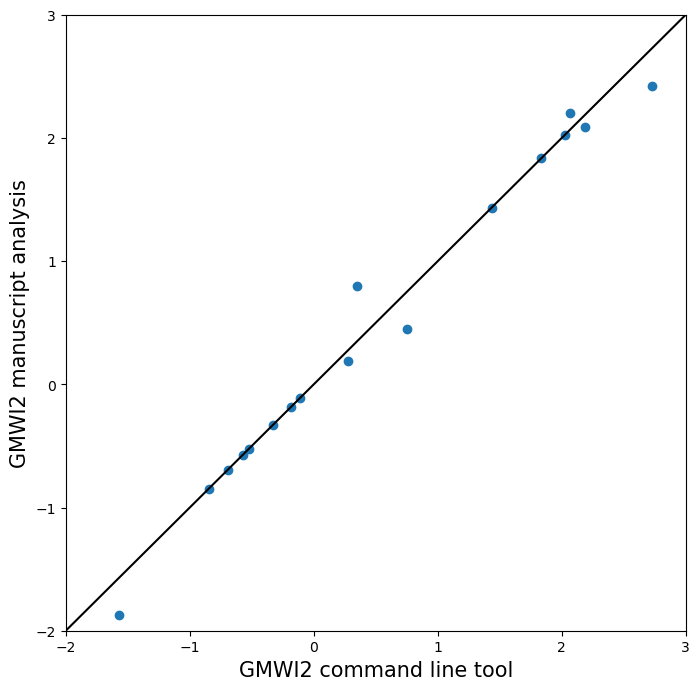

In [93]:
plt.figure(figsize=(8, 8), dpi=100)

plt.scatter([
    2.0698340682025576,
    2.724889273036047,
    0.3507647706642374,
    0.27379300459187167,
    -0.11041414072679964,
    1.8333197368581324,
    -0.33244591042742055,
    0.7526431794579536,
    -0.5249834045079548,
    2.0233879295415123,
    -0.8487444741775139,
    -1.5688252527878512,
    -0.18132869232697257,
    2.1842492347952804,
    -0.5737687939882709,
    1.4344003669365089,
    -0.6950844516946564,
    ], [
    2.199320469858948,
    2.424786871394448,
    0.7991598125605215,
    0.1877851923392375,
    -0.1104141407267996,
    1.8333197368581329,
    -0.3324459104274204,
    0.4504207213480886,
    -0.5249834045079549,
    2.023387929541512,
    -0.8487444741775142,
    -1.872721537979999,
    -0.1813286923269722,
    2.0917409840089047,
    -0.5737687939882706,
    1.4344003669365089,
    -0.6950844516946564,
])

plt.axline((0, 0), slope=1, c='k')
plt.xlabel("GMWI2 command line tool", fontsize=15)
plt.ylabel("GMWI2 manuscript analysis", fontsize=15)
plt.xlim(-2, 3)
plt.ylim(-2, 3)